<a href="https://colab.research.google.com/github/zvyag/PyTorch-for-Deep-Learning-and-Computer-Vision-Course-All-Codes-/blob/master/pytorch_hello.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install torch

In [0]:
import torch
import numpy as np
import torch.nn as nn
from torch.nn import Linear
import matplotlib.pyplot as plt
from sklearn import datasets

#### create 1D tensor

In [3]:
v = torch.tensor([1, 2, 3, 4, 5, 6])
print(v)

tensor([1, 2, 3, 4, 5, 6])


In [4]:
f = torch.FloatTensor([1, 2, 3, 4])
print(f)

tensor([1., 2., 3., 4.])


#### check the datatype

In [5]:
# check the data type
print(v.dtype)
print(f.dtype)

torch.int64
torch.float32


**check the size**

In [6]:
print(v.size())
print(f.size())

torch.Size([6])
torch.Size([4])


**rearrange the elements**

In [7]:
v.view(6, 1)  # similar to reshape in numpy

tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]])

In [8]:
v.view(2, 3)

tensor([[1, 2, 3],
        [4, 5, 6]])

In [9]:
v.view(3, -1)  # second dimension is infered from the original shape

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [10]:
v

tensor([1, 2, 3, 4, 5, 6])

#### element access

In [11]:
v[0]

tensor(1)

In [12]:
v[1:4]  # stop index is exclusive!

tensor([2, 3, 4])

In [13]:
v[1:]

tensor([2, 3, 4, 5, 6])

**convert np arrays to tensors and vice versa**

In [14]:
a = np.array([1, 2, 3, 4, 5])
tensor_cnv = torch.from_numpy(a)
print(tensor_cnv)
print(tensor_cnv.type())

tensor([1, 2, 3, 4, 5])
torch.LongTensor


In [15]:
numpy_cnv = tensor_cnv.numpy()
print(numpy_cnv)

[1 2 3 4 5]


**matrix multiplication**

In [16]:
mat_a = torch.tensor([0, 3, 5, 5, 5, 2]).view(2, 3)
mat_a

tensor([[0, 3, 5],
        [5, 5, 2]])

In [17]:
mat_b = torch.tensor([3, 4, 3, -2, 4, -2]).view(3, 2)
mat_b

tensor([[ 3,  4],
        [ 3, -2],
        [ 4, -2]])

In [18]:
torch.matmul(mat_a, mat_b)

tensor([[ 29, -16],
        [ 38,   6]])

In [19]:
mat_a@mat_b

tensor([[ 29, -16],
        [ 38,   6]])

**derivatives**

In [20]:
x = torch.tensor(2.0, requires_grad=True)
y = 9*x**4 + 2*x**3 + 3*x**2 + 6*x + 1
y.backward()
x.grad

tensor(330.)

In [21]:
x = torch.tensor(1.0, requires_grad=True)
z = torch.tensor(2.0, requires_grad=True)
y = x**2 + z**3
y.backward()
print(x.grad)
print(z.grad)

tensor(2.)
tensor(12.)


**linear model**

In [0]:
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

In [0]:
def forward(x):
  return w*x + b

In [24]:
x = torch.tensor([4, 7])
forward(x)

tensor([13, 22], grad_fn=<AddBackward0>)

**with linear class**

In [0]:
torch.manual_seed(1)
model = Linear(in_features=1, out_features=1)

In [26]:
print(model.bias)
print(model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True)
Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [27]:
x = torch.tensor([[2.0], [3.0]])
print(model(x))

tensor([[0.5891],
        [1.1044]], grad_fn=<AddmmBackward>)


**creating the dataset**

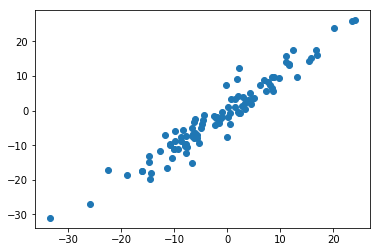

In [28]:
X = torch.randn(100, 1)*10
y = X + 3*torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o')

**custom models**

In [0]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
    
  def forward(self, x):
    return self.linear(x)

In [30]:
torch.manual_seed(1)
model = LR(1, 1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [0]:
[w, b] = model.parameters()
def get_params():
  return(w[0][0].item(), b[0].item())

In [0]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()

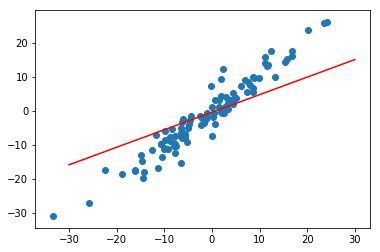

In [33]:
plot_fit("initial model")

In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

In [35]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  print("epoch: ", i, "loss: ", loss.item())
  
  losses.append(loss)
  optimizer.zero_grad()  # gradients accumulate, hence need to reset
  loss.backward()  # comupute the gradient
  optimizer.step()  # update the parameters of the model

epoch:  0 loss:  36.44832992553711
epoch:  1 loss:  25.84706687927246
epoch:  2 loss:  19.274919509887695
epoch:  3 loss:  15.200485229492188
epoch:  4 loss:  12.674422264099121
epoch:  5 loss:  11.10822868347168
epoch:  6 loss:  10.137072563171387
epoch:  7 loss:  9.534791946411133
epoch:  8 loss:  9.161184310913086
epoch:  9 loss:  8.92933464050293
epoch:  10 loss:  8.785365104675293
epoch:  11 loss:  8.69587516784668
epoch:  12 loss:  8.640158653259277
epoch:  13 loss:  8.605380058288574
epoch:  14 loss:  8.58358097076416
epoch:  15 loss:  8.569830894470215
epoch:  16 loss:  8.56106948852539
epoch:  17 loss:  8.555403709411621
epoch:  18 loss:  8.551656723022461
epoch:  19 loss:  8.549099922180176
epoch:  20 loss:  8.547282218933105
epoch:  21 loss:  8.545924186706543
epoch:  22 loss:  8.54485034942627
epoch:  23 loss:  8.543954849243164
epoch:  24 loss:  8.543170928955078
epoch:  25 loss:  8.54245662689209
epoch:  26 loss:  8.541786193847656
epoch:  27 loss:  8.541145324707031
epoc

Text(0.5, 0, 'epoch')

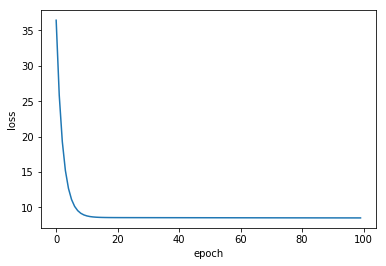

In [36]:
plt.plot(range(epochs), losses)
plt.ylabel("loss")
plt.xlabel("epoch")

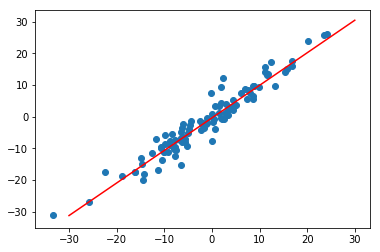

In [37]:
plot_fit("trained model")

## Perceptron
**create dataset**

In [0]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y)

In [0]:
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])

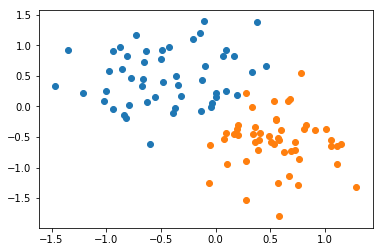

In [40]:
scatter_plot()

In [0]:
class Model(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  
  def forward(self, x):
    return torch.sigmoid(self.linear(x))
  
  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0

In [42]:
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [43]:
[w, b] = model.parameters()
w1, w2 = w.view(2)
def get_params():
  return(w1.item(), w2.item(), b[0].item())

print(get_params())

(0.16220331192016602, -0.1682732105255127, 0.19390898942947388)


In [0]:
def plot_fit(title):
  plt.title = title
  w1, w2, b1 = get_params()
  x1 = np.array([-2.0, 2.0])
  x2 = (w1*x1 + b1) / -w2
  plt.plot(x1, x2, 'r')
  scatter_plot()


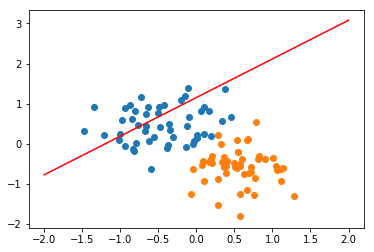

In [45]:
plot_fit("initial model")

In [0]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [47]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  #print("epoch: ", i, "loss", loss.item())
  
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  
  

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:512: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


Text(0.5, 0, 'epoch')

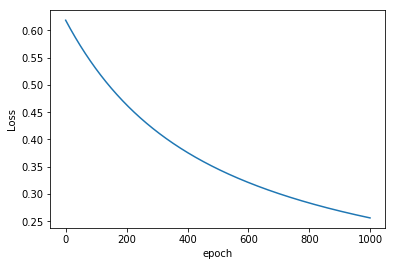

In [48]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel("epoch")

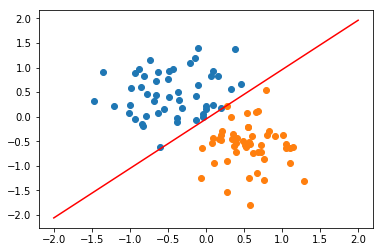

In [49]:
plot_fit("trained model")

red point positive probability = 0.9424158334732056
black point positive probability = 0.05055497586727142
red point in class 1
black point in class 0


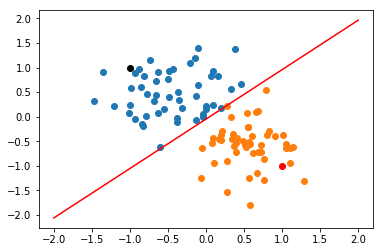

In [50]:
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], "ro")
plt.plot(point2.numpy()[0], point2.numpy()[1], "ko")

print("red point positive probability = {}".format(model.forward(point1).item()))
print("black point positive probability = {}".format(model.forward(point2).item()))
print("red point in class {}".format(model.predict(point1)))
print("black point in class {}".format(model.predict(point2)))

plot_fit("trained_model")